# Module 5

# Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker

%matplotlib notebook

#Linear Regression
from sklearn import linear_model

#used for 3D plot
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#igore warning
import warnings
warnings.filterwarnings("ignore")

# Reading data and preprocessing

In [2]:
df = pd.read_csv('swapLiborData.csv')

#convert number to datatime format
for i in range(df.shape[0]):
    df.loc[i,'Date'] = pd.to_datetime('1899-12-30') + pd.to_timedelta(df.loc[i,'Date'],'D')
    
df.head(5)

,Date,US0001M,US0002M,US0003M,US0006M,US0012M,USSW2,USSW3,USSW5,USSW7,USSW10,USSW15,USSW30
0,2014-01-02 00:00:00,0.1683,0.21250,0.24285,0.3464,0.5826,0.4903,0.8705,1.7740,2.4540,3.0610,3.5613,3.8950
1,2014-01-03 00:00:00,0.1647,0.20995,0.23985,0.3452,0.5846,0.5113,0.9000,1.7920,2.4648,3.0665,3.5635,3.8953
2,2014-01-06 00:00:00,0.1625,0.20825,0.23935,0.3445,0.5854,0.5000,0.8760,1.7468,2.4203,3.0260,3.5315,3.8738
3,2014-01-07 00:00:00,0.1615,0.20820,0.24210,0.3447,0.5866,0.4985,0.8735,1.7375,2.4065,3.0098,3.5145,3.8580
4,2014-01-08 00:00:00,0.1610,0.20750,0.24040,0.3452,0.5856,0.5350,0.9520,1.8280,2.4835,3.0650,3.5500,3.8703


# Gradient Descent

In [3]:
#Simulate data

#lenT = int(np.ceil(len(df)/2))
lenT = len(df)

yY = df.iloc[:lenT,8]
xX = df.iloc[:lenT,6]

a = np.arange(-200, 200+5, 5.0)
len1 = len(a)
b = np.arange(-200, 200+5, 5.0)
len2 = len(b)
s = np.zeros((len2,len1))

a, b = np.meshgrid(a, b)

for i in range(len1):
    for j in range(len2):
        s[j,i] = np.sum((yY-a[j,i]-b[j,i]*xX)**2)/(2*lenT)

# Visualization

<IPython.core.display.Javascript object>


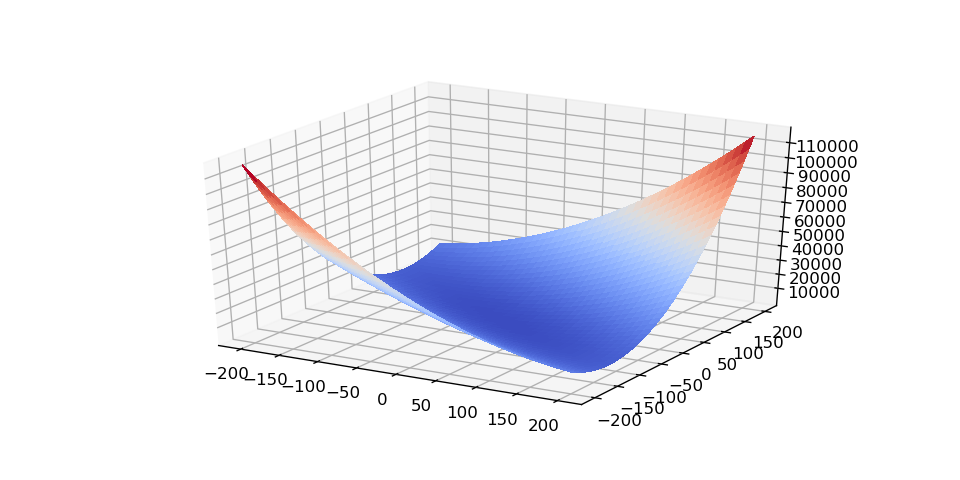

In [4]:
##surface
fig = plt.figure(figsize=(8,4))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(a, b, s, cmap=cm.coolwarm, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10000))

plt.show()

<IPython.core.display.Javascript object>


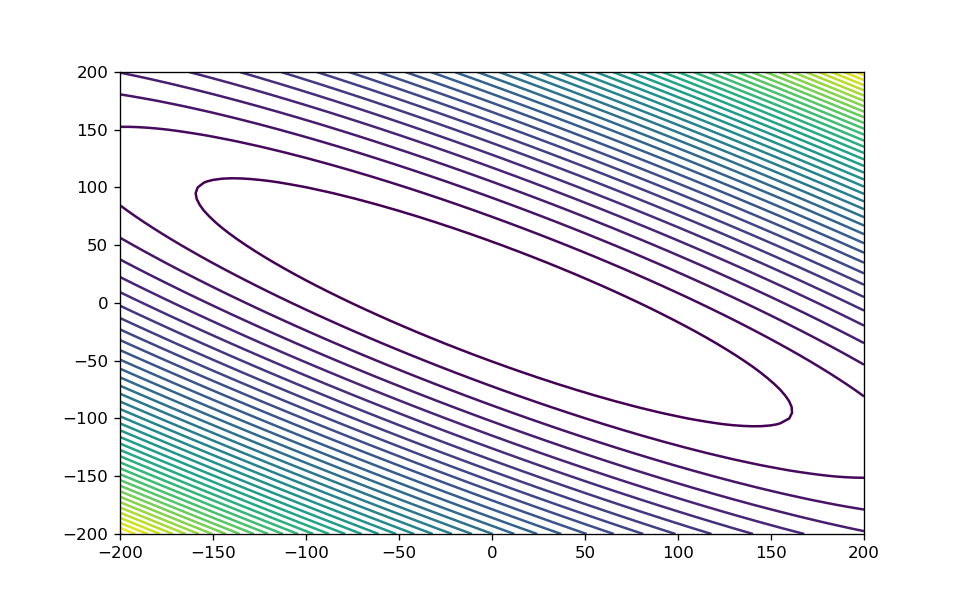

In [5]:
##contour

plt.figure(figsize=(8,5)) # set the figure size
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))

plt.show()

# Various Learning Rates

In [6]:
#import objective function and gradient
from gradient import *
from objFunc1 import *

$\gamma = 0.005, n=300$

<IPython.core.display.Javascript object>


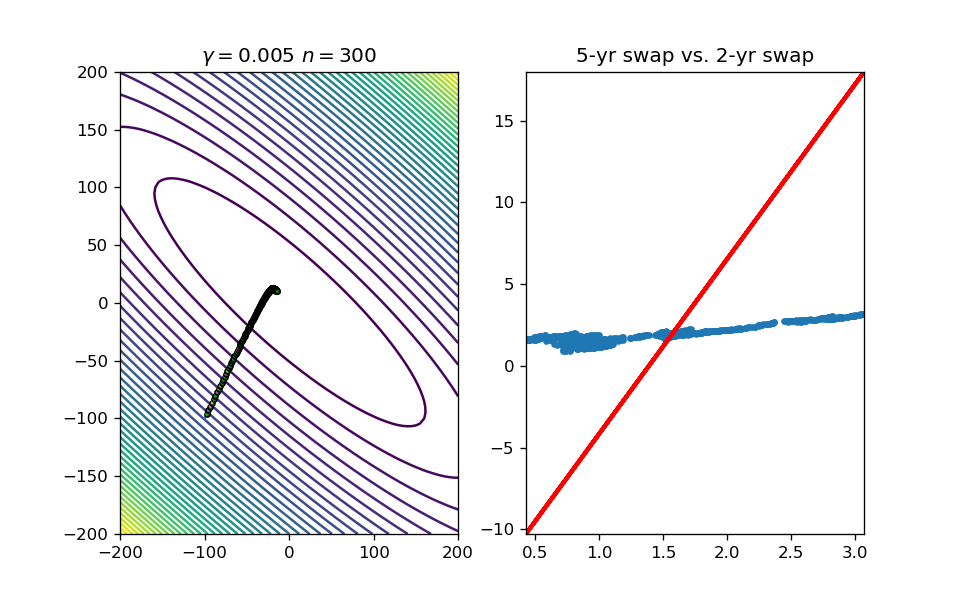

-------------------------
300 of iterations:
optimal results:
[-14.823150531231191, 10.68748297630813]


In [7]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.005

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

$\gamma = 0.1, n=264$

<IPython.core.display.Javascript object>


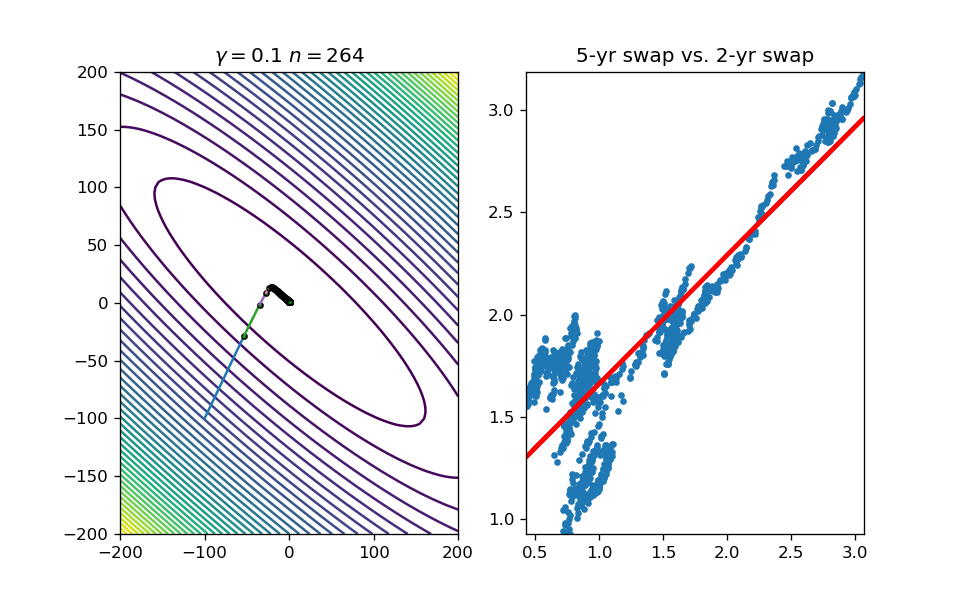

-------------------------
264 of iterations:
optimal results:
[1.0359797451543376, 0.62796863106499512]


In [8]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.1

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

$\gamma = 0.2, n=140$

<IPython.core.display.Javascript object>


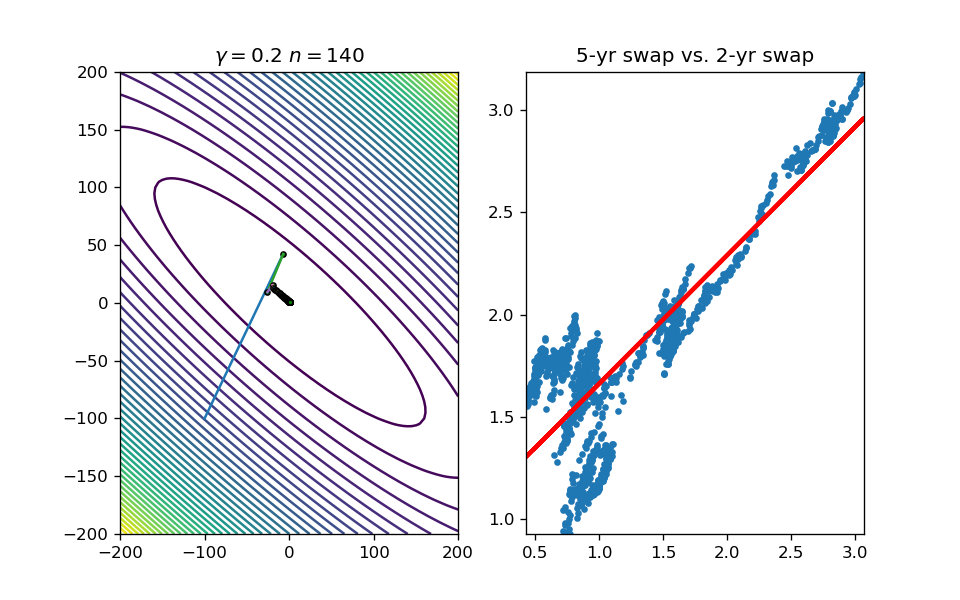

-------------------------
140 of iterations:
optimal results:
[1.0374653043745212, 0.62702498711741905]


In [9]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.2

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e

plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

$\gamma = 0.3, n=95$

<IPython.core.display.Javascript object>


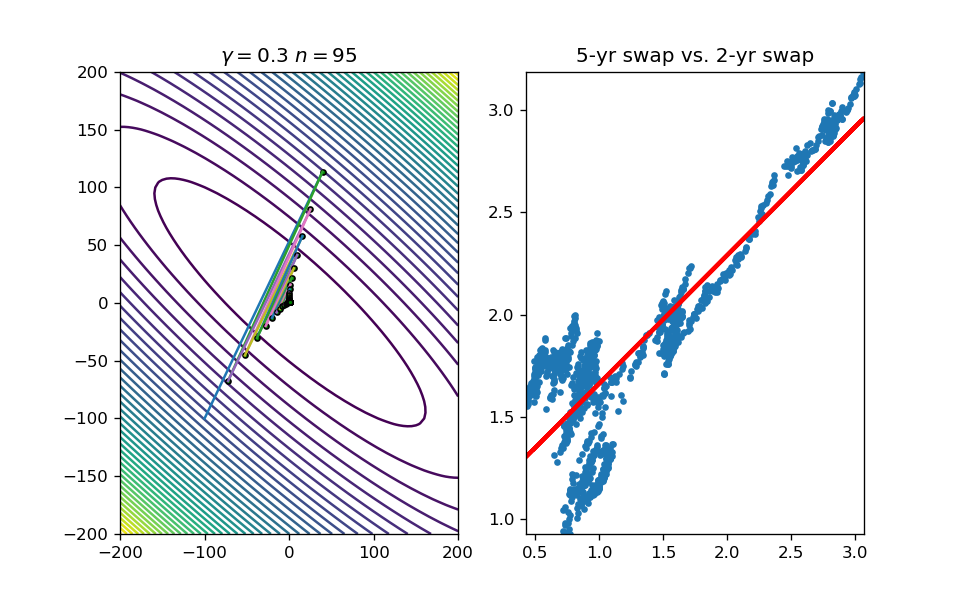

-------------------------
95 of iterations:
optimal results:
[1.0378901610179903, 0.62675042252534841]


In [10]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.3

plotNum = 1

ePre = 0
maxCounts = 300
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()

$\gamma = 0.33, n=50$

<IPython.core.display.Javascript object>


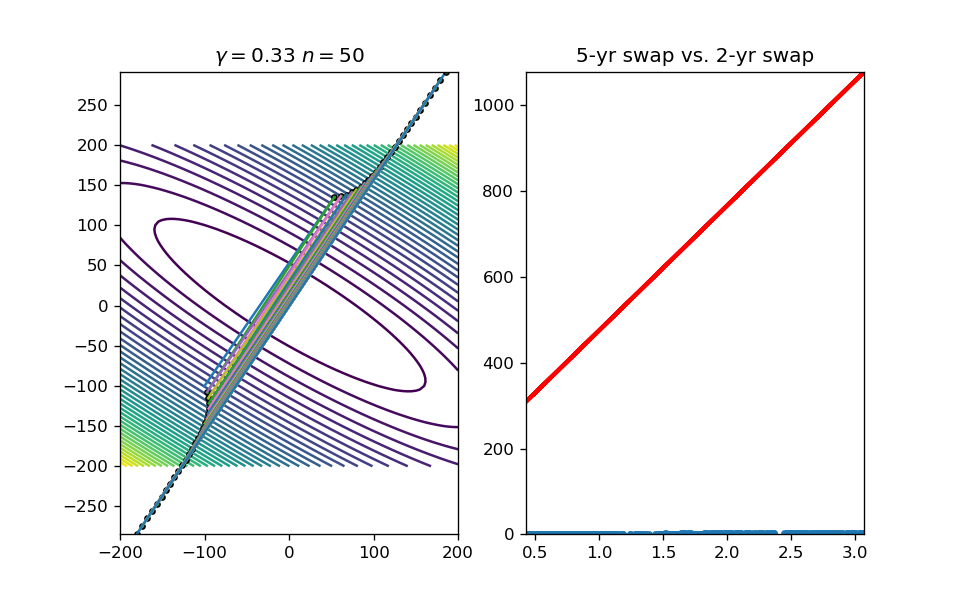

-------------------------
50 of iterations:
optimal results:
[185.2505380566532, 290.76290926401145]


In [11]:
# initial point
a0 = -100
a1 = -100
x_i = [a0, a1]
x_0 = x_i

# learning rate
g1 = 0.33

plotNum = 1

ePre = 0
maxCounts = 50
tol = 1e-4
counter = 0

plt.figure(figsize=(8,5)) # set the figure size
plt.subplot(1,2,1)
plt.contour(a,b,s,40)

plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)
plt.gca().xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(100))
plt.gca().yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(50))


while 1:  
    
    counter = counter+1     
    delF = gradient(x_i, yY, xX)

    x_pre = x_i;
    x_i = x_i - g1*delF
    
    
    plt.subplot(1,2,1)
    plt.plot([x_pre[0], x_i[0]], [x_pre[1], x_i[1]])
    plt.plot(x_i[0], x_i[1], 'o', LineWidth=2, MarkerEdgeColor='k', MarkerFaceColor='g', MarkerSize=3)
    
    a0 = x_i[0]
    a1 = x_i[1]
           
    e = objFunc1([a0, a1], yY, xX)
    
    if (abs(ePre-e)<tol and max(abs(x_pre-x_i))<tol) or (counter > maxCounts):
        break
    
    ePre = e


plt.subplot(1,2,2)
plt.plot(xX, yY, '.')
plt.plot(xX, a0+a1*xX, 'r-', LineWidth=2.5)
plt.title('5-yr swap vs. 2-yr swap')
plt.autoscale(enable=True, axis='x', tight=True)
plt.autoscale(enable=True, axis='y', tight=True)

print('-------------------------')
print('%s of iterations:' % (str(counter-1)) )
print('optimal results:')
print([x_i[0], x_i[1]])

plt.subplot(1,2,1)
plt.title(r'$\gamma =$'+str(g1)+r' $n=$'+str(counter-1))

plt.show()